# **NAME**- SWASTIK ROY CHOUDHURY

### **Email Id** - swastikroychoudhury014@gmail.com



# **Title**
**FutureCart**: *AI-Driven Demand Prediction for Smarter Retail.*

# **Project Statement:**
In the realm of E-commerce, demand forecasting plays a pivotal role in ensuring business success. This project aims to develop a demand forecasting model in an E-commerce business that predicts future product demand leveraging time series analysis and multivariate regression based on historical sales data, along with Google Analytics KPIs such as Google clicks and Facebook impressions, which are valuable indicators of customer interest.

# **Outcomes**

**>Improved Inventory Management:** More accurate demand forecasts lead to better inventory decisions, potentially reducing stock-outs and excess inventory.

**>Enhanced Marketing Efficiency:** Identify periods of high demand for targeted marketing campaigns, optimizing resource allocation.

**>Data-Driven Decision Making:** Reliable forecasts provide a basis for business decisions, such as pricing adjustments or product promotions.

**>Accurate Demand Predictions:** Implement a forecasting model that achieves high accuracy in predicting future demands, thereby improving customer service levels.

**>Scalable Solution:** Develop a solution that can scale to handle large datasets and varying demand patterns across multiple products.

# **Milestone 1: Week 1**
# Module 1: Data Collection
• Understanding the problem statement

• Gathering sales data from relevant sources (database, store records)

• Collecting Google Analytics and Facebook Impressions data

In [ ]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

# **Datasets Used**

In [ ]:
import pandas as pd

# Loading the Excel files from your Google Drive
df1 = pd.read_excel('/content/drive/MyDrive/Data/ProductA.xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/Data/ProductA_fb_impressions.xlsx')
df3 = pd.read_excel('/content/drive/MyDrive/Data/ProductA_google_clicks.xlsx')

# Displaying the first 5 rows of each DataFrame
print("Top 5 rows of ProductA.xlsx:")
print(df1.head())

print("\nTop 5 rows of ProductA_fb_impressions.xlsx:")
print(df2.head())

print("\nTop 5 rows of ProductA_google_clicks.xlsx:")
print(df3.head())


Top 5 rows of ProductA.xlsx:
   Day Index  Quantity
0 2021-12-01        14
1 2021-12-02        10
2 2021-12-03        13
3 2021-12-04        22
4 2021-12-05        33

Top 5 rows of ProductA_fb_impressions.xlsx:
   Day Index  Impressions
0 2021-12-01          620
1 2021-12-02          890
2 2021-12-03          851
3 2021-12-04          881
4 2021-12-05          678

Top 5 rows of ProductA_google_clicks.xlsx:
   Day Index  Clicks
0 2021-12-01     445
1 2021-12-02     433
2 2021-12-03     424
3 2021-12-04     427
4 2021-12-05     451


# **MERGING THE DATASETS INTO A MASTER DATASET**

In [ ]:
import pandas as pd

# Loading the Excel files from Google Drive
df1 = pd.read_excel('/content/drive/MyDrive/Data/ProductA.xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/Data/ProductA_fb_impressions.xlsx')
df3 = pd.read_excel('/content/drive/MyDrive/Data/ProductA_google_clicks.xlsx')

# Merge the DataFrames on 'Day Index' using left join
merged_df = df1.merge(df2, how="left", on='Day Index').merge(df3, how="left", on='Day Index')

# All rows and columns of the merged DataFrame are displayed below
print(merged_df)

# Saving the merged DataFrame to a new Excel file
output_file_path = '/content/drive/MyDrive/Data/Master_ProductA_dataset.xlsx'
merged_df.to_excel(output_file_path, index=False)
print(f"Merged dataset saved as '{output_file_path}'")



     Day Index  Quantity  Impressions  Clicks
0   2021-12-01        14          620     445
1   2021-12-02        10          890     433
2   2021-12-03        13          851     424
3   2021-12-04        22          881     427
4   2021-12-05        33          678     451
5   2021-12-06        12          995     429
6   2021-12-07        29          910     444
7   2021-12-08        24          867     431
8   2021-12-09        23         1128     456
9   2021-12-10        38         1129     391
10  2021-12-11        20         1461     447
11  2021-12-12        21         1237     347
12  2021-12-13        18         1403     443
13  2021-12-14        15         1641     427
14  2021-12-15        15         1496     423
15  2021-12-16        11         1775     404
16  2021-12-17        17         1619     413
17  2021-12-18        14          969     370
18  2021-12-19        11          678     429
19  2021-12-20        18         1330     383
20  2021-12-21        13         1

# **Milestone 1: Week 2**
# Module 2: Exploratory Data Analysis (EDA) and Data Preprocessing

• Ensuring my sales data is in a time series format (e.g., daily, weekly, monthly) with timestamps.

• Cleaning and formating data, handling missing values and outliers. Address them using appropriate techniques (imputation, elimination).

• Ploting the distribution plots on independent variables.

• Visualizations to understand trends, seasonality, and correlations.

• Statistical summaries.

**Cleaning and Formating data.**

In [ ]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

import pandas as pd

# Loading the uploaded Excel file

data = pd.read_excel('/content/drive/MyDrive/Data/Master_ProductA_dataset.xlsx')

# Finding missing values
missing_values = data.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

Mounted at /content/drive
Day Index      0
Quantity       0
Impressions    0
Clicks         0
dtype: int64


Formating

In [ ]:
# I'm importing the NumPy library for numerical operations and assigning it the alias 'np'.
import numpy as np

# I'm defining a function named 'detect_outliers_zscore' that takes a DataFrame 'data' and an optional threshold 'threshold' as input.
# The default threshold is set to 3.
def detect_outliers_zscore(data, threshold=3):
    # I'm creating an empty dictionary to store the indices of outliers for each numerical column.
    outliers = {}
    # I'm iterating over the numerical columns in the DataFrame.
    for col in data.select_dtypes(include=[np.number]).columns:
        # I'm calculating the mean and standard deviation of the current column.
        mean = np.mean(data[col])
        std = np.std(data[col])
        # I'm calculating the Z-scores for each value in the column.
        z_scores = [(x - mean) / std for x in data[col]]
        # I'm identifying the indices of values with Z-scores greater than the threshold.
        outliers[col] = np.where(np.abs(z_scores) > threshold)
    # I'm returning the dictionary containing the outlier indices.
    return outliers

# I'm calling the 'detect_outliers_zscore' function with the 'data' DataFrame and storing the result in 'outliers_zscore'.
outliers_zscore = detect_outliers_zscore(data)
# I'm printing the 'outliers_zscore' dictionary to the console.
print(outliers_zscore)

{'Quantity': (array([  9,  78, 142]),), 'Impressions': (array([], dtype=int64),), 'Clicks': (array([], dtype=int64),)}


**Detecting Outliers**

In [ ]:
# I am importing the pandas library as 'pd' so I can work with data in a structured format
import pandas as pd

# I am loading the Excel file into a pandas DataFrame to analyze and manipulate the data
data = pd.read_excel('/content/drive/MyDrive/Data/Master_ProductA_dataset.xlsx')

# I am defining a function to detect outliers in a specified column of the DataFrame
def detect_outliers(df, column):
    # Calculating the first quartile (Q1) to use in outlier detection
    Q1 = df[column].quantile(0.25)
    # Calculating the third quartile (Q3) to use in outlier detection
    Q3 = df[column].quantile(0.75)
    # Calculating the interquartile range (IQR) as the difference between Q3 and Q1
    IQR = Q3 - Q1
    # Defining the lower bound, anything below this will be considered an outlier
    lower_bound = Q1 - 1.5 * IQR
    # Defining the upper bound, anything above this will be considered an outlier
    upper_bound = Q3 + 1.5 * IQR
    # Filtering the DataFrame to get rows where the values fall outside the bounds
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    # Returning the DataFrame of outliers for further analysis or reporting
    return outliers

# I am applying the outlier detection function to each specified column
for column in ['Quantity', 'Impressions', 'Clicks']:
    # Detecting outliers for the current column and storing the result
    outliers = detect_outliers(data, column)
    # Printing the outliers for the current column to review any anomalies in the data
    print(f"Outliers in {column}:\n", outliers)


Outliers in Quantity:
      Day Index  Quantity  Impressions  Clicks
4   2021-12-05        33          678     451
9   2021-12-10        38         1129     391
78  2022-02-17        38         2351     505
113 2022-03-24        32         1321     547
142 2022-04-22        36         1163     470
Outliers in Impressions:
 Empty DataFrame
Columns: [Day Index, Quantity, Impressions, Clicks]
Index: []
Outliers in Clicks:
 Empty DataFrame
Columns: [Day Index, Quantity, Impressions, Clicks]
Index: []


**Cleaning: Replacing outliers with median**

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# I am importing the pandas library as 'pd' and numpy as 'np' to handle data and perform numerical operations
import pandas as pd
import numpy as np

# I am loading my dataset from an Excel file into a pandas DataFrame to start working with it
data = pd.read_excel('/content/drive/MyDrive/Data/Master_ProductA_dataset.xlsx')

# I am defining a function to replace outliers in numeric columns with the median value of that column
def replace_outliers(data, threshold=3):
    # I am selecting only numeric columns in the dataset to focus on relevant data for outlier replacement
    numeric_columns = data.select_dtypes(include=[np.number]).columns
    for col in numeric_columns:
        # Calculating the mean of the current column for outlier detection
        mean = data[col].mean()
        # Calculating the standard deviation of the column to set the outlier threshold
        std = data[col].std()
        # Identifying outliers by checking which values lie beyond the specified threshold from the mean
        outliers = (data[col] - mean).abs() > threshold * std
        # Calculating the median of the column to use as a replacement for detected outliers
        median = data[col].median()
        # Replacing outliers with the median value to maintain data consistency
        data.loc[outliers, col] = median
    # Returning the modified DataFrame with outliers replaced
    return data

# I am applying the outlier replacement function to the dataset and storing the cleaned data in a new variable
data_cleaned = replace_outliers(data)

# I am saving the cleaned dataset to a new Excel file for future use
data_cleaned.to_excel('/content/drive/MyDrive/Data/cleaned_file.xlsx', index=False)

# Printing a confirmation message to indicate that outliers have been replaced and the cleaned file is saved
print("Outliers replaced and cleaned data saved to '/content/drive/MyDrive/Data/cleaned_file.xlsx'.")


Outliers replaced and cleaned data saved to '/content/drive/MyDrive/Data/cleaned_file.xlsx'.


# **Insights**

I started by importing the necessary libraries: `google.colab.drive` and `pandas`. I then mounted my Google Drive to access my dataset.

Next, I loaded the Excel file, "Master_ProductA_dataset.xlsx," into a pandas DataFrame. To get a sense of the data quality, I checked for missing values using `data.isnull().sum()`. This gave me a clear picture of the columns with missing data.

To identify potential outliers, I implemented two methods:

**1. Z-Score Method:**
   - I defined a function `detect_outliers_zscore` that takes a DataFrame and an optional threshold as input.
   - For each numerical column, I calculated the mean and standard deviation.
   - Then, I computed the Z-score for each data point.
   - Outliers were identified as data points with Z-scores exceeding the specified threshold.

**2. IQR Method:**
   - I defined a function `detect_outliers` that takes a DataFrame and a column name as input.
   - I calculated the first quartile (Q1) and third quartile (Q3) of the specified column.
   - The interquartile range (IQR) was computed.
   - Outliers were identified as data points lying below Q1 - 1.5*IQR or above Q3 + 1.5*IQR.

After identifying the outliers, I decided to replace them with the median value of the respective columns. I defined a function `replace_outliers` to achieve this. For each numerical column, I calculated the mean and standard deviation. Data points exceeding a certain threshold were considered outliers and replaced with the median.

Finally, I saved the cleaned dataset to a new Excel file, "cleaned_file.xlsx," for further analysis.


**Enhancing the dataset (Feature Engineering)**

In [ ]:
# I am importing the pandas library as 'pd' to work with the dataset in a structured format
import pandas as pd

# I am loading my dataset from an Excel file into a pandas DataFrame to start analyzing and enhancing it
data = pd.read_excel('/content/drive/MyDrive/Data/cleaned_file.xlsx')

# Displaying the first few rows of the original data to understand its current structure
print("Original Data:")
print(data.head())

# I am beginning the feature engineering process to create new insights from the existing data

# 1. I am creating new features from existing columns
# Converting the 'Day Index' column to a datetime format, assuming it contains date information
data['Day Index'] = pd.to_datetime(data['Day Index'])
# Extracting the day of the week from the 'Day Index' and creating a new column with this information
data['Day of Week'] = data['Day Index'].dt.day_name()

# 2. I am creating interaction features to analyze relationships between variables
# Calculating 'Clicks per Impression' by dividing 'Clicks' by 'Impressions' and storing it in a new column
data['Clicks per Impression'] = data['Clicks'] / data['Impressions']

# 3. I am creating polynomial features to capture non-linear relationships in the data
# Creating a new column for 'Quantity Squared' by squaring the values in the 'Quantity' column
data['Quantity Squared'] = data['Quantity'] ** 2

# Displaying the first few rows of the modified data to review the newly created features
print("Data after Feature Engineering:")
print(data.head())

# I am saving the modified dataset with the engineered features to a new Excel file for further analysis
data.to_excel('/content/drive/MyDrive/Data/enhanced_file.xlsx', index=False)

# Printing a confirmation message to indicate that feature engineering is complete and the file is saved
print("Enhancement completed and saved to '/content/drive/MyDrive/Data/enhanced_file.xlsx'.")


Original Data:
   Day Index  Quantity  Impressions  Clicks
0 2021-12-01        14          620     445
1 2021-12-02        10          890     433
2 2021-12-03        13          851     424
3 2021-12-04        22          881     427
4 2021-12-05        33          678     451
Data after Feature Engineering:
   Day Index  Quantity  Impressions  Clicks Day of Week  \
0 2021-12-01        14          620     445   Wednesday   
1 2021-12-02        10          890     433    Thursday   
2 2021-12-03        13          851     424      Friday   
3 2021-12-04        22          881     427    Saturday   
4 2021-12-05        33          678     451      Sunday   

   Clicks per Impression  Quantity Squared  
0               0.717742               196  
1               0.486517               100  
2               0.498237               169  
3               0.484677               484  
4               0.665192              1089  
Enhancement completed and saved to '/content/drive/MyDrive/Data/

In [ ]:
import pandas as pd

# Load the data
data= pd.read_excel('/content/drive/MyDrive/Data/enhanced_file.xlsx')


# Display the first few rows of the dataset
data.head()

,Day Index,Quantity,Impressions,Clicks,Day of Week,Clicks per Impression,Quantity Squared
0,2021-12-01,14,620,445,Wednesday,0.717742,196
1,2021-12-02,10,890,433,Thursday,0.486517,100
2,2021-12-03,13,851,424,Friday,0.498237,169
3,2021-12-04,22,881,427,Saturday,0.484677,484
4,2021-12-05,33,678,451,Sunday,0.665192,1089


# **Insights**

**Feature Engineering**

I started by loading the cleaned dataset into a pandas DataFrame. To gain a better understanding of the data, I printed the first few rows.

**Feature Creation**

I then embarked on the feature engineering process to extract more insights from the data:

1. **Datetime Conversion and Extraction:**
   - I converted the 'Day Index' column to a datetime format.
   - I extracted the day of the week from the 'Day Index' and created a new column 'Day of Week'.

2. **Interaction Feature:**
   - I calculated 'Clicks per Impression' by dividing 'Clicks' by 'Impressions' and added it as a new column.

3. **Polynomial Feature:**
   - I created a new column 'Quantity Squared' by squaring the values in the 'Quantity' column.

I printed the first few rows of the modified DataFrame to visualize the newly created features. Finally, I saved the enhanced dataset to a new Excel file, "enhanced_file.xlsx".

**Loading the Enhanced Dataset**

I loaded the enhanced dataset that I had previously created into a pandas DataFrame. To get a quick overview, I printed the first few rows.


***I am plotting distribution plots for independent variables, visualizing trends, seasonality, and correlations, and providing detailed statistical summaries for insights.***

First few rows of the dataset:
   Day Index  Quantity  Impressions  Clicks Day of Week  \
0 2021-12-01        14          620     445   Wednesday   
1 2021-12-02        10          890     433    Thursday   
2 2021-12-03        13          851     424      Friday   
3 2021-12-04        22          881     427    Saturday   
4 2021-12-05        33          678     451      Sunday   

   Clicks per Impression  Quantity Squared  
0               0.717742               196  
1               0.486517               100  
2               0.498237               169  
3               0.484677               484  
4               0.665192              1089  

Basic statistics of the dataset:
                 Day Index    Quantity  Impressions     Clicks  \
count                  212  212.000000   212.000000  212.00000   
mean   2022-03-16 12:00:00   17.254717  1531.702830  358.20283   
min    2021-12-01 00:00:00    5.000000   620.000000   60.00000   
25%    2022-01-22 18:00:00   13.750000  1209.7

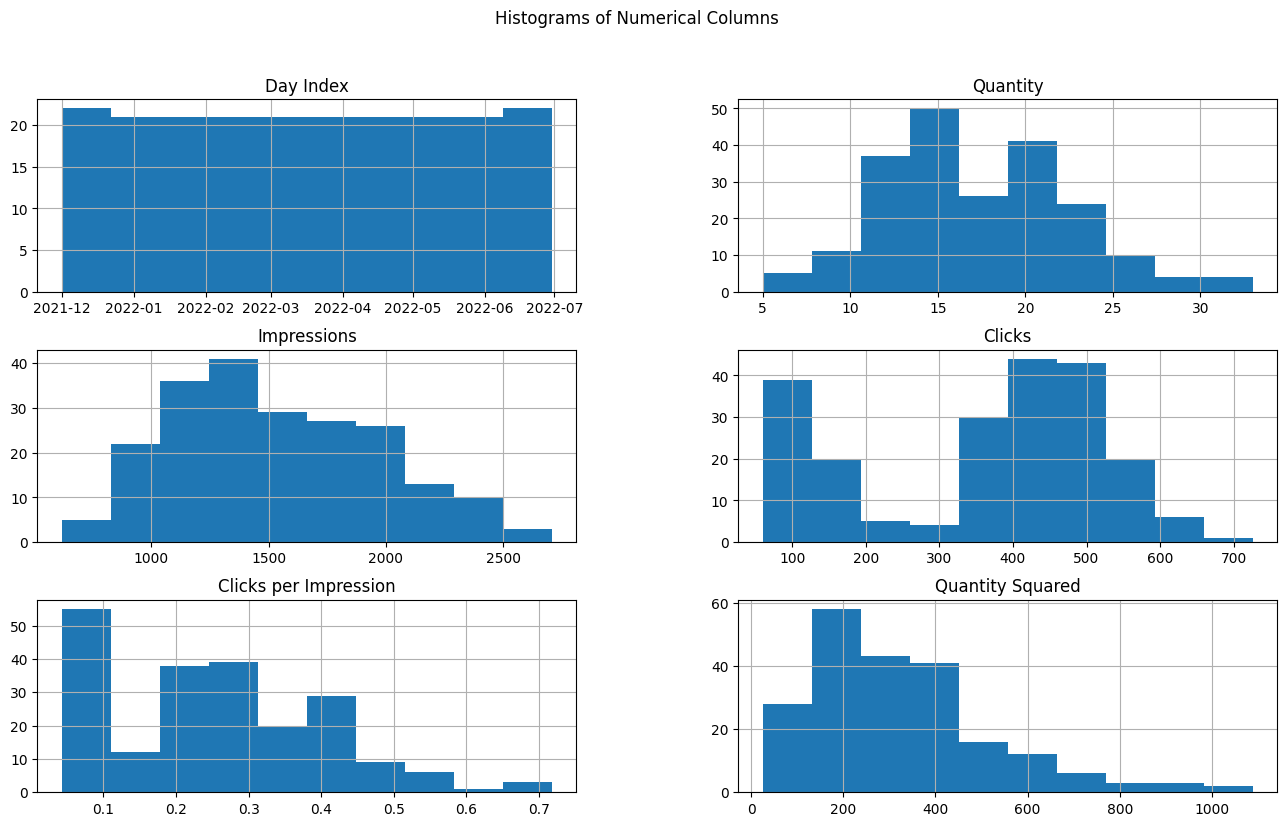

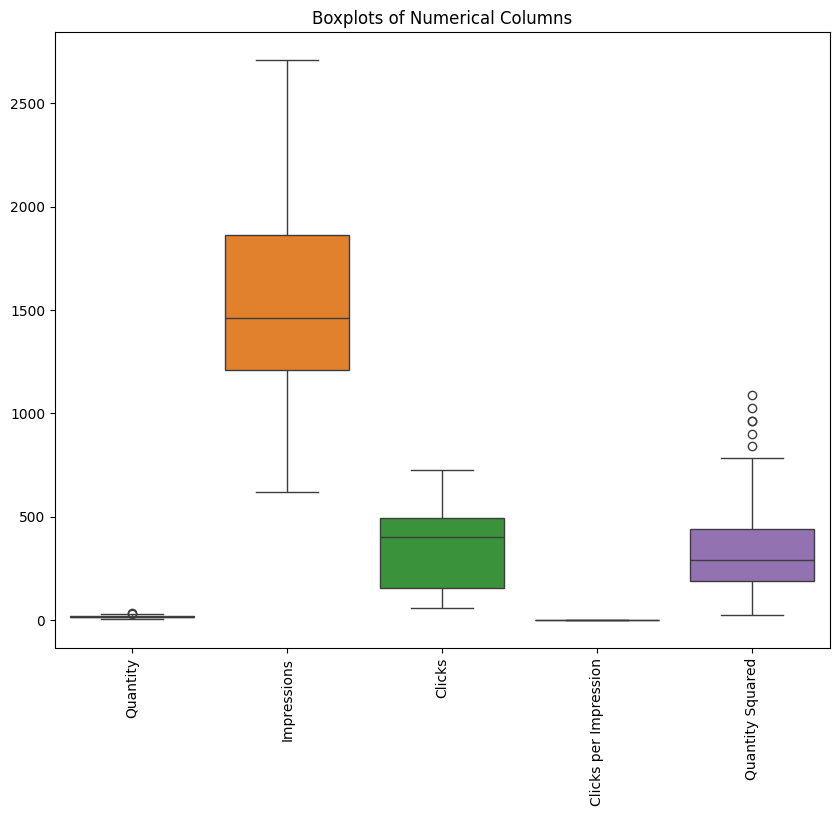


Pairplot to visualize relationships between columns:


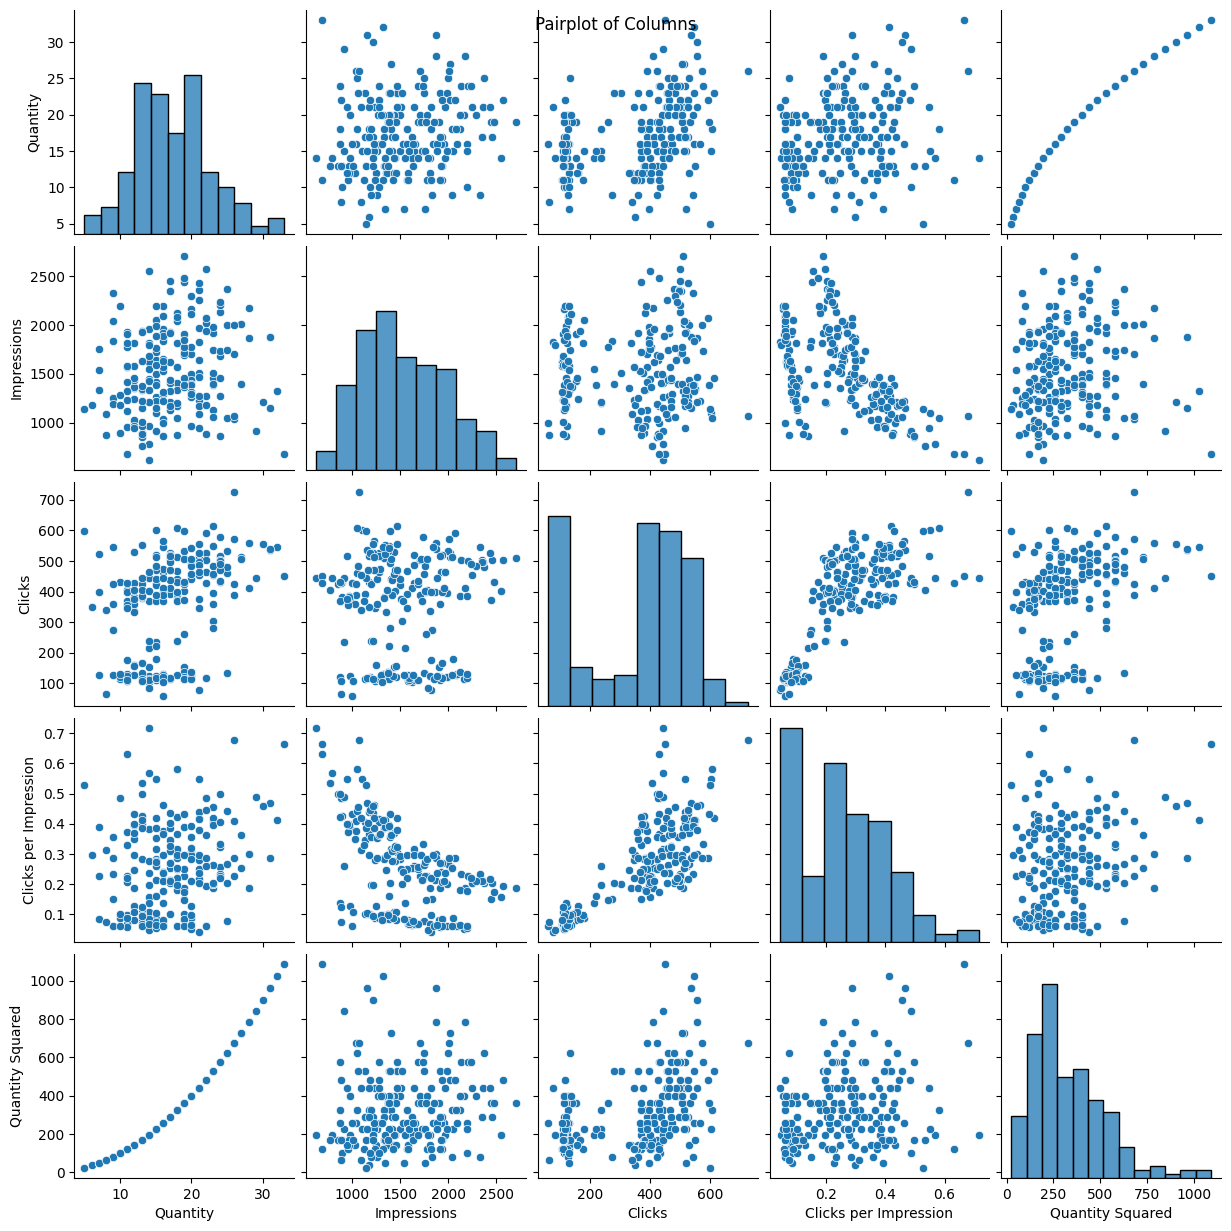

In [ ]:
# I am importing pandas, matplotlib, and seaborn to handle data analysis and visualization tasks
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# I am loading my dataset from an Excel file into a pandas DataFrame for analysis
df = pd.read_excel('/content/drive/MyDrive/Data/enhanced_file.xlsx')

# Displaying the first few rows of the dataset to get an initial view of the data structure
print("First few rows of the dataset:")
print(df.head())

# Displaying basic statistical summaries for each column to understand distributions and data ranges
print("\nBasic statistics of the dataset:")
print(df.describe())

# Checking for any missing values in the dataset to address data completeness
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Visualizing data distributions to observe the spread and identify any patterns or outliers

# Plotting histograms for numerical columns to get a sense of the distribution of values in each column
print("\nData distribution plots:")
df.hist(figsize=(16, 9))
plt.suptitle('Histograms of Numerical Columns')
plt.show()

# Using boxplots to detect outliers in the numerical columns for potential further analysis or cleaning
plt.figure(figsize=(10, 8))
sns.boxplot(data=df)
plt.title('Boxplots of Numerical Columns')
plt.xticks(rotation=90)
plt.show()

# Generating a pairplot to visualize relationships and correlations between numerical columns in the dataset
print("\nPairplot to visualize relationships between columns:")
sns.pairplot(df)
plt.suptitle('Pairplot of Columns')
plt.show()


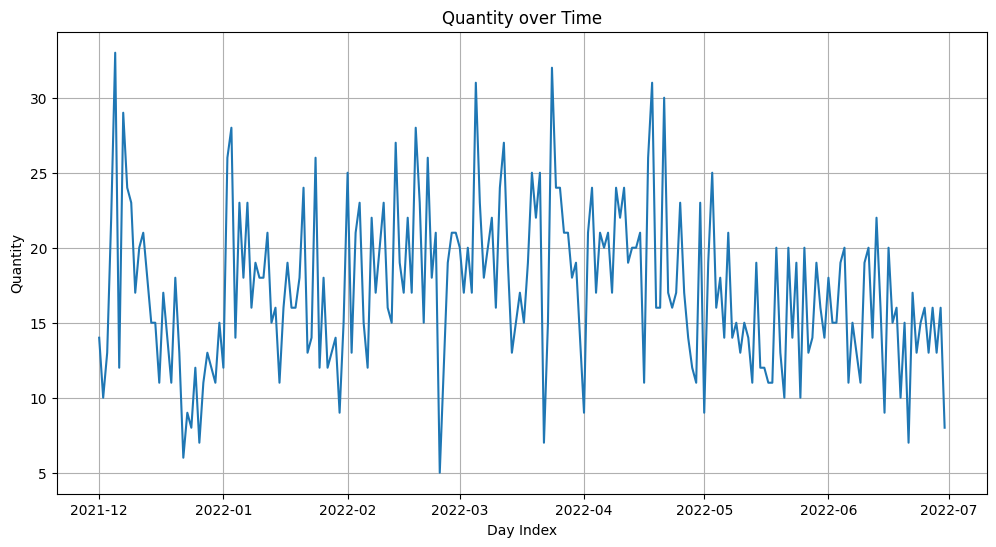

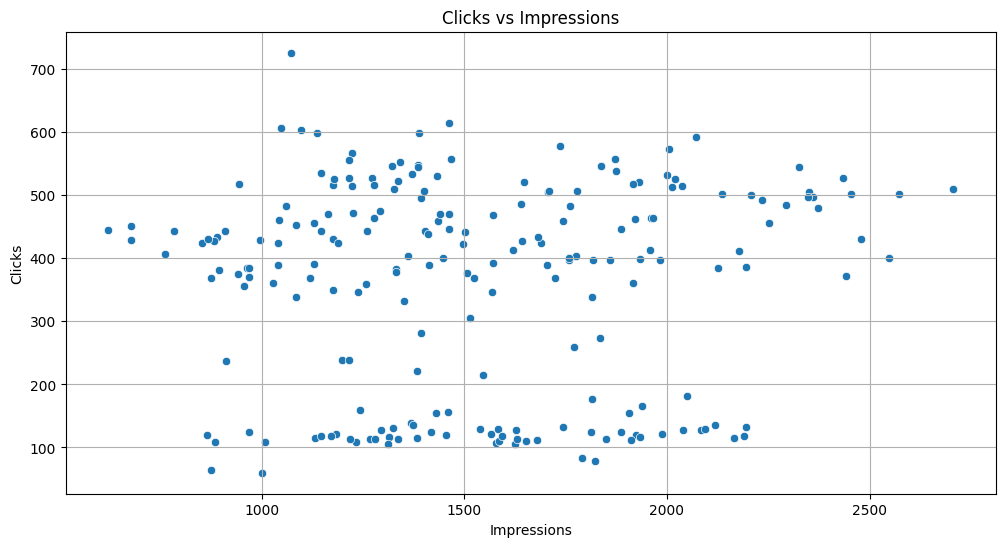

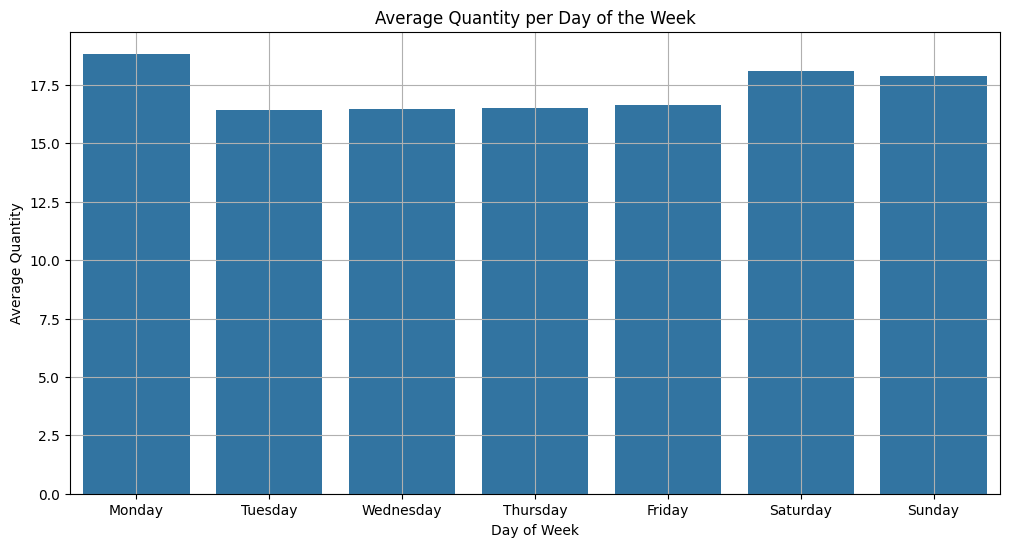

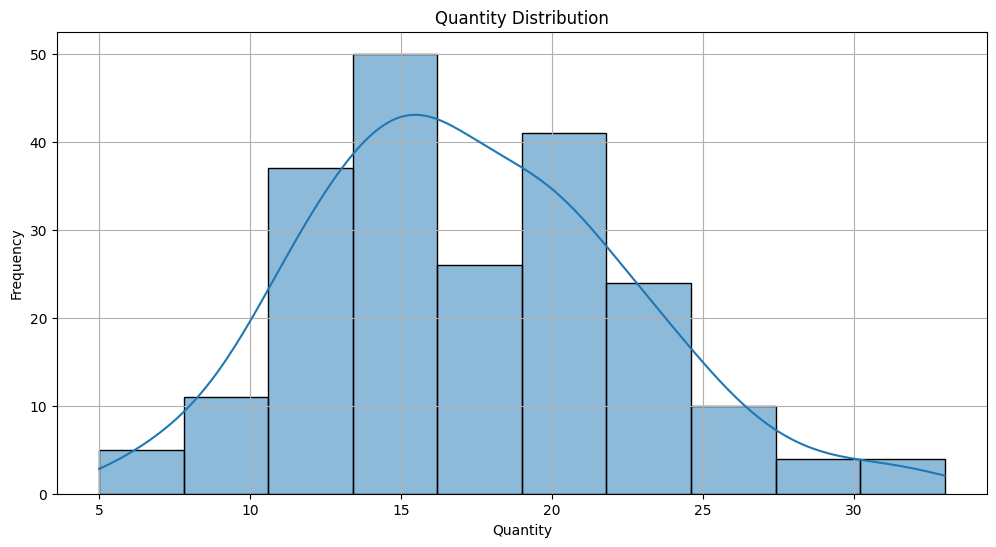

In [ ]:
# I am importing matplotlib and seaborn libraries to create visualizations of my data
import matplotlib.pyplot as plt
import seaborn as sns

# I am converting the 'Day Index' column to datetime format to ensure accurate plotting over time
data['Day Index'] = pd.to_datetime(data['Day Index'])

# I am creating a line plot to visualize how 'Quantity' changes over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Day Index', y='Quantity')
plt.title('Quantity over Time')  # Setting the title to describe the chart
plt.xlabel('Day Index')          # Labeling the x-axis
plt.ylabel('Quantity')            # Labeling the y-axis
plt.grid(True)                    # Adding a grid for easier interpretation
plt.show()                        # Displaying the plot

# I am creating a scatter plot to examine the relationship between 'Clicks' and 'Impressions'
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Impressions', y='Clicks')
plt.title('Clicks vs Impressions')  # Setting the title to describe the chart
plt.xlabel('Impressions')           # Labeling the x-axis
plt.ylabel('Clicks')                # Labeling the y-axis
plt.grid(True)                      # Adding a grid for easier interpretation
plt.show()                          # Displaying the plot

# I am generating a bar plot to show the average 'Quantity' per day of the week
plt.figure(figsize=(12, 6))
# Grouping data by 'Day of Week' and calculating the average 'Quantity' for each day
avg_quantity_per_day = data.groupby('Day of Week')['Quantity'].mean().reset_index()
# Plotting with specified order for days of the week
sns.barplot(data=avg_quantity_per_day, x='Day of Week', y='Quantity', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Average Quantity per Day of the Week')  # Setting the title to describe the chart
plt.xlabel('Day of Week')                          # Labeling the x-axis
plt.ylabel('Average Quantity')                     # Labeling the y-axis
plt.grid(True)                                     # Adding a grid for easier interpretation
plt.show()                                         # Displaying the plot

# I am creating a histogram to observe the distribution of 'Quantity' values
plt.figure(figsize=(12, 6))
sns.histplot(data['Quantity'], bins=10, kde=True)  # Adding a KDE for a smoothed distribution curve
plt.title('Quantity Distribution')                 # Setting the title to describe the chart
plt.xlabel('Quantity')                             # Labeling the x-axis
plt.ylabel('Frequency')                            # Labeling the y-axis
plt.grid(True)                                     # Adding a grid for easier interpretation
plt.show()                                         # Displaying the plot


## Data Exploration and Visualization

**Initial Exploration**

1. **Loaded Data:** I started by loading the enhanced dataset, "enhanced_file.xlsx," into a pandas DataFrame for further analysis.
2. **Previewed Data:** I printed the first few rows to get a glimpse of the data structure.
3. **Summary Statistics:** I generated basic descriptive statistics for each column to understand data distribution and ranges.
4. **Missing Values:** I checked for missing values to ensure data completeness.
5. **Data Distribution Visualization:**
   - I created histograms for numerical columns to visualize value distribution and identify potential patterns or outliers.
   - I used boxplots to detect outliers in the numerical columns for further analysis or cleaning.
6. **Relationships and Correlations:** I generated a pairplot to explore relationships and potential correlations between numerical columns.

**Creating Specific Visualizations**

1. **Time Series Plot:** I converted the 'Day Index' column to datetime format for accurate time-based visualizations.
   - I then created a line plot to visualize how 'Quantity' changed over time.

2. **Scatter Plot:** I created a scatter plot to examine the relationship between 'Clicks' and 'Impressions'.

3. **Bar Plot - Day of Week:** I investigated average 'Quantity' by day of the week:
   - I grouped data by 'Day of Week' and calculated the average 'Quantity'.
   - I created a bar plot with a specific order for days of the week (Monday to Sunday) to  visualize trends.

4. **Histogram:** Finally, I generated a histogram to observe the distribution of 'Quantity' values. I added a kernel density estimation (KDE) for a smoother distribution curve.


# INSIGHTS ON PLOTS

# **Sales Data Overview:**

**Sales Trends Over Time:** A time series plot displays trends in sales volume over days, highlighting seasonal patterns and periodic fluctuations. This plot may indicate peak sales periods and dips, useful for identifying demand cycles.

**Monthly Sales Patterns:** A monthly aggregated view could reveal patterns in sales volume across different months, indicating seasonal trends and potential high-demand periods within a year.

# **Product Demand Distribution:**

**Product-Level Sales Distribution:** A bar chart or histogram showcasing sales distribution across different product categories or individual products helps in understanding which products drive the majority of sales, potentially highlighting bestsellers and low-demand items.

**Demand Distribution by Region:** A geographical or segmented plot displays how demand varies by region or store location, which can aid in targeted inventory distribution and regional marketing strategies.

# **Customer Segmentation Insights:**

**Customer Purchase Frequency:** A histogram showing the frequency of purchases per customer type (e.g., new vs. returning customers) helps in segmenting high-value and low-frequency customers, guiding personalized marketing.

**Age or Income-Based Purchase Trends:** If demographic information is available, analyzing purchase behavior by age or income groups could offer insights into which demographic segments contribute most to sales.

# **Forecast Accuracy Comparison:**

**Actual vs. Predicted Sales:** A line plot or scatter plot that overlays actual and predicted sales data for specific periods. This allows an assessment of model performance, identifying areas where the prediction model accurately captures demand and where it diverges.

# **AFTER WEEK 2**

# ***Time Series Modeling & Multivariate Regression***

In my demand prediction project, I will be continuously exploring and applying various time series and multivariate modeling algorithms to achieve accurate and reliable forecasts. Here’s how I will approach this:

# **Time Series Modeling Algorithms**
I will be implementing a range of time series algorithms to understand trends and predict future demand patterns over time:

- **ARIMA (Auto-Regressive Integrated Moving Average)**: I will be using ARIMA to focus on univariate time series forecasting, which will allow me to model demand based on historical data patterns.
  
- **SARIMA (Seasonal ARIMA)**: I will be extending ARIMA to SARIMA, enabling me to account for seasonality in demand, making my predictions more adaptable to cyclical trends.

- **Exponential Smoothing (ETS)**: I will be employing Exponential Smoothing techniques to capture both trends and seasonality within the data. This will enhance my model's ability to predict demand by smoothing fluctuations in historical data.

- **Prophet**: I will be utilizing Facebook’s Prophet, a forecasting model designed to handle seasonality and missing data, making it ideal for complex demand patterns. Prophet will allow me to better manage seasonality, particularly in E-commerce data with potential irregularities.

# **Multivariate Regression Models**

To incorporate multiple influencing factors into my demand predictions, I will be utilizing various multivariate regression models:

- **Multiple Linear Regression**: I will be leveraging Multiple Linear Regression to predict demand based on several independent variables, such as impressions and clicks. This model will help me understand the direct relationships between these variables and demand.

- **Decision Trees and Random Forest Regression**: I will be utilizing Decision Trees and Random Forest Regression to capture complex, non-linear relationships between demand and a wide range of features. These models will enable me to make robust predictions by understanding different patterns within the data.

- **Gradient Boosting Regressor**: I will be applying Gradient Boosting Regressor for more accurate predictions with multiple variables. By combining the power of multiple weak learners, Gradient Boosting will enhance my ability to model complex interactions between demand drivers.

- **LSTM (Long Short-Term Memory) Neural Network**: I will be incorporating LSTM, a neural network architecture well-suited for sequential data, to capture temporal dependencies in time-series data. This will allow me to model demand patterns over time with greater precision.

By employing these algorithms, I will be creating a comprehensive, data-driven demand prediction solution that is adaptable to varying patterns and complex relationships, thus achieving a robust forecasting model for smarter retail.